#**Importing Libraries**

In [ ]:
# Data manipulation and analysis
import pandas as pd  # Pandas for data manipulation and analysis
import numpy as np   # NumPy for numerical operations

# Text preprocessing
import re   # Regular expressions for text preprocessing
import nltk   # Natural Language Toolkit for text processing
from bs4 import BeautifulSoup   # BeautifulSoup for HTML parsing
from nltk.corpus import stopwords   # Stopwords for removing common words
from nltk.tokenize import word_tokenize   # Tokenization for splitting text into words
from nltk.stem import WordNetLemmatizer, PorterStemmer   # Lemmatization and stemming for word normalization
!pip install contractions
import contractions   # Contractions for expanding contractions in text
from nltk.util import ngrams

# Data splitting and encoding
from sklearn.model_selection import train_test_split   # Train-test split for dividing data into training and testing sets
from sklearn.preprocessing import LabelEncoder   # Label encoding for converting categorical labels to numerical format
from imblearn.over_sampling import RandomOverSampler

# Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer   # TF-IDF and Count Vectorizers for text feature extraction
from keras.preprocessing.text import Tokenizer   # Tokenizer for converting text into numerical sequences
from keras.preprocessing.sequence import pad_sequences   # Padding sequences for equal length input to neural networks

# Model building
from keras.models import Sequential   # Sequential model for neural network construction
from keras.layers import LSTM, Bidirectional, Dense, Dropout, Embedding, SpatialDropout1D   # Layers for neural network architecture
from sklearn.svm import SVC   # Support Vector Classifier for SVM model
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier   # Gradient Boosting and Random Forest classifiers
from sklearn.naive_bayes import MultinomialNB   # Multinomial Naive Bayes classifier
from sklearn.pipeline import Pipeline
from keras.optimizers.legacy import Adam
from keras.callbacks import EarlyStopping
import pickle

# Metrics evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix, classification_report, precision_recall_fscore_support   # Metrics for model evaluation


# Data visualization
import matplotlib.pyplot as plt   # Matplotlib for plotting
import seaborn as sns   # Seaborn for statistical data visualization
from wordcloud import WordCloud   # WordCloud for visualizing word frequencies
from collections import Counter   # Counter for counting occurrences of elements

# Natural Language Toolkit
import nltk   # Natural Language Toolkit for text processing
from nltk.corpus import stopwords   # Stopwords for removing common words
from nltk.tokenize import word_tokenize   # Tokenization for splitting text into words
from nltk.stem import WordNetLemmatizer   # Lemmatization for word normalization
from nltk.stem import PorterStemmer   # Stemming for word normalization

# Download NLTK resources
nltk.download('stopwords')   # Download stopwords resource
nltk.download('punkt')   # Download punkt resource for tokenization
nltk.download('wordnet')   # Download wordnet resource for lemmatization

#Connecting Google Drive with the Colab file
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')     # Mounting Google Drive with colab

#**Importing the Dataset**

In [ ]:
#Loading the Dataset
# dataset_file_path = '/content/drive/MyDrive/Sentiment_Analyser/Dataset/merged_dataset.csv'
dataset_file_path = '/content/drive/MyDrive/Sentiment_Analyser/Dataset/emotions_final.csv'

output_data_file_path = '/content/drive/MyDrive/Sentiment_Analyser/Dataset/text_data_input.csv'

# Load your dataset
Dataset = pd.read_csv(dataset_file_path)
Dataset = Dataset.iloc[:20000,:]

In [ ]:
print(Dataset)

                                                    Text  Emotion
0          i just feel really helpless and heavy hearted     fear
1      ive enjoyed being able to slouch about relax a...  sadness
2      i gave up my internship with the dmrg and am f...     fear
3                             i dont know i feel so lost  sadness
4      i am a kindergarten teacher and i am thoroughl...     fear
...                                                  ...      ...
49995  i will flush all the crap and the fat out so i...      joy
49996  i can think of a few things that i feel like w...      joy
49997  i would recommend it to anyone who feels dissa...    anger
49998  i think that what i m feeling here goes a lot ...      joy
49999  i feel homesick when i have the barcelona team...  sadness

[50000 rows x 2 columns]


In [ ]:
print(Dataset.shape)

(50000, 2)


In [ ]:
noOfMissingValues = Dataset.iloc[:,:].isnull().sum()
print(noOfMissingValues)

Text       0
Emotion    0
dtype: int64


In [ ]:
# Remove NaN values
Dataset = Dataset.dropna()
Dataset.reset_index(drop=True, inplace=True)

In [ ]:
print(Dataset)

                                                    Text  Emotion
0          i just feel really helpless and heavy hearted     fear
1      ive enjoyed being able to slouch about relax a...  sadness
2      i gave up my internship with the dmrg and am f...     fear
3                             i dont know i feel so lost  sadness
4      i am a kindergarten teacher and i am thoroughl...     fear
...                                                  ...      ...
49995  i will flush all the crap and the fat out so i...      joy
49996  i can think of a few things that i feel like w...      joy
49997  i would recommend it to anyone who feels dissa...    anger
49998  i think that what i m feeling here goes a lot ...      joy
49999  i feel homesick when i have the barcelona team...  sadness

[50000 rows x 2 columns]


In [ ]:
print("Duplicate Values : ",Dataset.duplicated().sum())

Duplicate Values :  14


In [ ]:
# Check for duplicate values in the dataset
duplicate_rows = Dataset[Dataset.duplicated()]

if duplicate_rows.shape[0] == 0:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found:\n", duplicate_rows)


Duplicate rows found:
                                                     Text  Emotion
8397   i told my staff i said you know i feel invigor...      joy
15187                                        i feel fine      joy
15638  i feel bob loblaw is a handsome professional m...      joy
19413  i feel tortured var fb comment action link hre...    anger
23711  i also have no particular feeling of patriotis...     love
26592                                      i feel gloomy  sadness
31771  i feel more adventurous willing to take risks ...      joy
34307                                    i feel troubled  sadness
38271                             ive been feeling needy  sadness
41697                                    i feel charming      joy
42385  i feel like i m much more considerate and can ...     love
44723                                        i feel fine      joy
47813                                    i feel delicate     love
48592            i say no i feel guilty img src http 

In [ ]:
# Delete duplicate values from the dataset
Dataset.drop_duplicates(inplace=True)

# Reset index after deleting duplicates
Dataset.reset_index(drop=True, inplace=True)

# Check the shape of the dataset after deleting duplicates
print("Shape of the dataset after deleting duplicates:", Dataset.shape)


Shape of the dataset after deleting duplicates: (49986, 2)


#**Data Visualization**

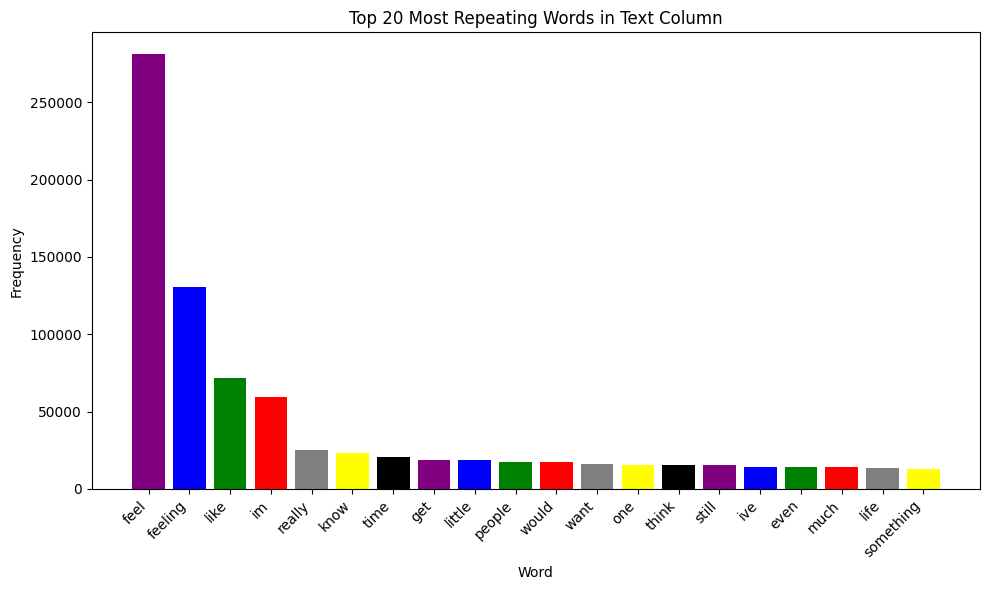

In [ ]:

# Tokenize the text in the "Text" column
temp_text = ' '.join(Dataset['Text']).lower()  # Combine all text into a single string

# Remove special characters, punctuation, numbers, and URLs
temp_text = re.sub(r"[^a-zA-Z\s]", "", temp_text)

# Removing Extra Spaces with Preceeding or successing Spaces
temp_text = re.sub(r"\s+", " ", temp_text)
temp_text = temp_text.strip()

temp_words = word_tokenize(temp_text)  # Tokenize the text into words

stop_words = set(stopwords.words('english'))
temp_words = [word for word in temp_words if word not in stop_words]

# Count the frequency of each word
word_freq = Counter(temp_words)

# Filter out the top 20 most repeating words
top_words = word_freq.most_common(20)

# Extract the top 20 words and their frequencies
top_words, top_frequencies = zip(*top_words)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_words, top_frequencies, color={'red','blue','yellow','green','black','grey','purple'})
plt.title('Top 20 Most Repeating Words in Text Column')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig1.png')
plt.show()


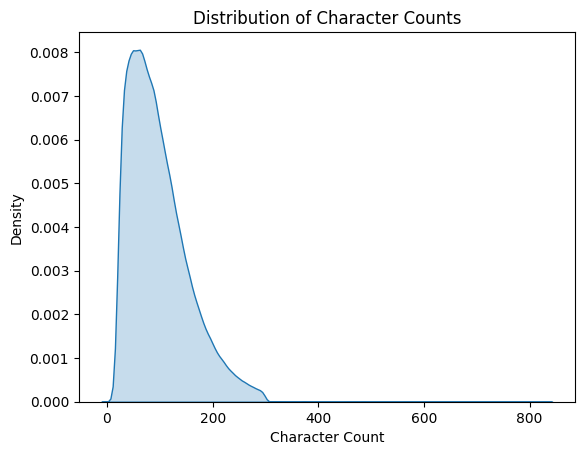

In [ ]:
# Calculate the character counts for each text
char_counts = Dataset['Text'].apply(len)

# Create a KDE plot for character counts
sns.kdeplot(char_counts, fill=True)

# Add a title to the plot
plt.title('Distribution of Character Counts')

# Add labels to the X and Y axes
plt.xlabel('Character Count')
plt.ylabel('Density')

# Save the plot as a PNG image
plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig2.png')

# Show the plot
plt.show()


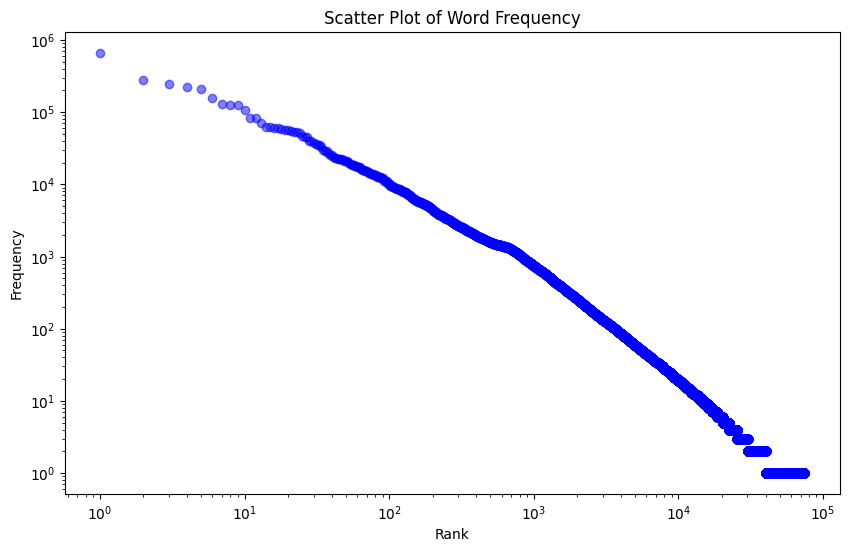

In [ ]:

# Combine all text into a single string
all_text = ' '.join(Dataset['Text'])

# Tokenize the text into words
words = all_text.split()

# Count the frequency of each word
word_freq = Counter(words)

# Sort the words by frequency in descending order
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Extract the word frequencies and ranks
word_ranks = list(range(1, len(sorted_word_freq) + 1))
word_frequencies = [freq for _, freq in sorted_word_freq]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(word_ranks, word_frequencies, color='blue', alpha=0.5)
plt.title('Scatter Plot of Word Frequency')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.xscale('log')  # Use logarithmic scale for better visualization
plt.yscale('log')
plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig3.png')
plt.show()


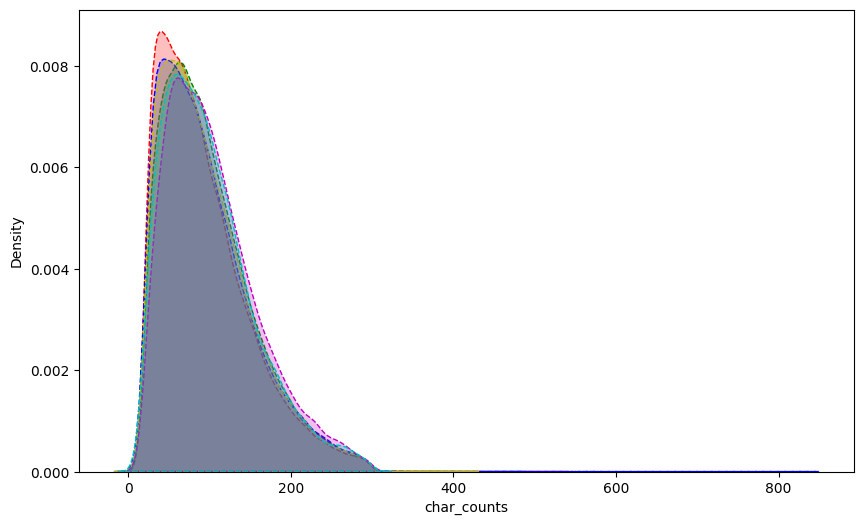

In [ ]:

df = Dataset
# Tokenize the 'Text' column to count the character lengths
df['char_counts'] = df['Text'].apply(len)

# Plot KDE plots for each sentiment category
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Emotion'] == 'sadness']['char_counts'], fill=True, color='r', linestyle='--', label='char_counts')
sns.kdeplot(df[df['Emotion'] == 'joy']['char_counts'], fill=True, color='g', linestyle='--', label='char_counts')
sns.kdeplot(df[df['Emotion'] == 'anger']['char_counts'], fill=True, color='b', linestyle='--', label='char_counts')
sns.kdeplot(df[df['Emotion'] == 'fear']['char_counts'], fill=True, color='y', linestyle='--', label='char_counts')
sns.kdeplot(df[df['Emotion'] == 'love']['char_counts'], fill=True, color='m', linestyle='--', label='char_counts')
sns.kdeplot(df[df['Emotion'] == 'surprise']['char_counts'], fill=True, color='c', linestyle='--', label='char_counts')

plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig4.png')
plt.show()


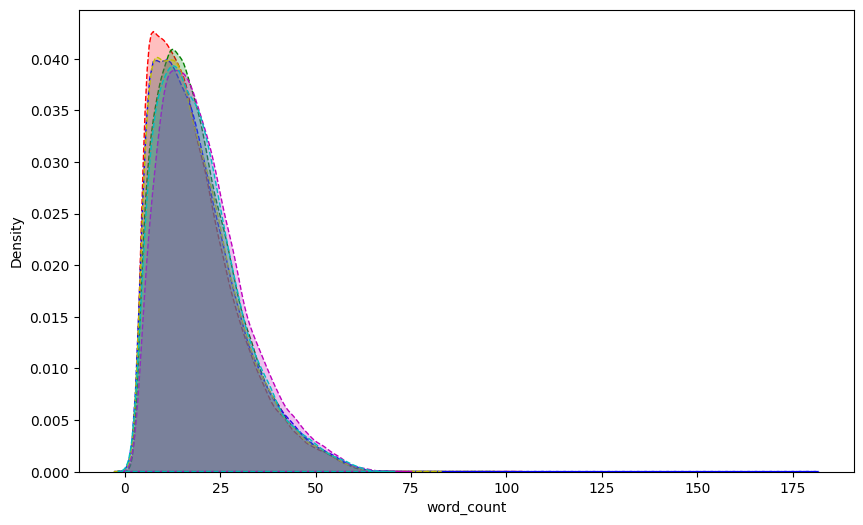

In [ ]:

df = Dataset
# Tokenize the 'Text' column to count the character lengths
df['word_count'] = df['Text'].apply(lambda x: len(word_tokenize(x)))

# Plot KDE plots for each sentiment category
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Emotion'] == 'sadness']['word_count'], fill=True, color='r', linestyle='--', label='word_count')
sns.kdeplot(df[df['Emotion'] == 'joy']['word_count'], fill=True, color='g', linestyle='--', label='word_count')
sns.kdeplot(df[df['Emotion'] == 'anger']['word_count'], fill=True, color='b', linestyle='--', label='word_count')
sns.kdeplot(df[df['Emotion'] == 'fear']['word_count'], fill=True, color='y', linestyle='--', label='word_count')
sns.kdeplot(df[df['Emotion'] == 'love']['word_count'], fill=True, color='m', linestyle='--', label='word_count')
sns.kdeplot(df[df['Emotion'] == 'surprise']['word_count'], fill=True, color='c', linestyle='--', label='word_count')

plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig5.png')
plt.show()


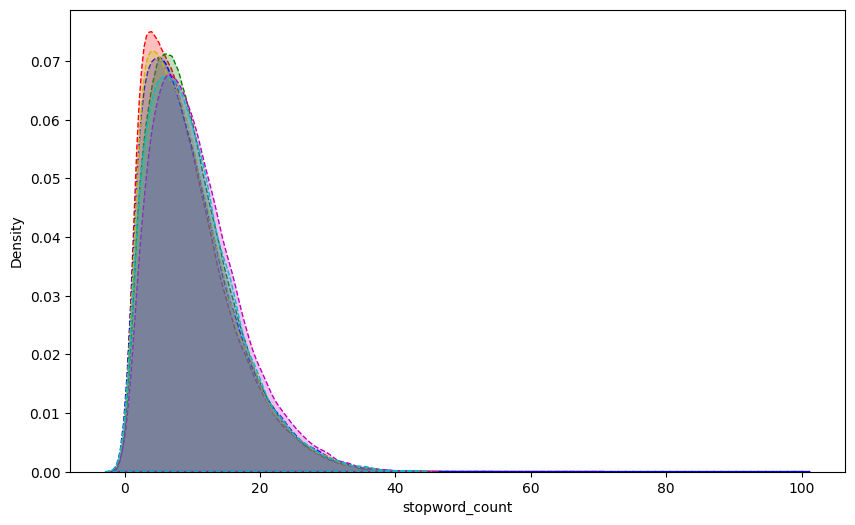

In [ ]:

df = Dataset
stop_words = set(stopwords.words('english'))

# Function to count stopwords in a text
def count_stopwords(text):
    words = word_tokenize(text)
    stopwords_count = sum(1 for word in words if word.lower() in stop_words)
    return stopwords_count

# Apply the function to create the stopword_counts column
df['stopword_count'] = df['Text'].apply(count_stopwords)

# Plot KDE plots for each sentiment category
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Emotion'] == 'sadness']['stopword_count'], fill=True, color='r', linestyle='--', label='stopword_count')
sns.kdeplot(df[df['Emotion'] == 'joy']['stopword_count'], fill=True, color='g', linestyle='--', label='stopword_count')
sns.kdeplot(df[df['Emotion'] == 'anger']['stopword_count'], fill=True, color='b', linestyle='--', label='stopword_count')
sns.kdeplot(df[df['Emotion'] == 'fear']['stopword_count'], fill=True, color='y', linestyle='--', label='stopword_count')
sns.kdeplot(df[df['Emotion'] == 'love']['stopword_count'], fill=True, color='m', linestyle='--', label='stopword_count')
sns.kdeplot(df[df['Emotion'] == 'surprise']['stopword_count'], fill=True, color='c', linestyle='--', label='stopword_count')

plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig6.png')
plt.show()


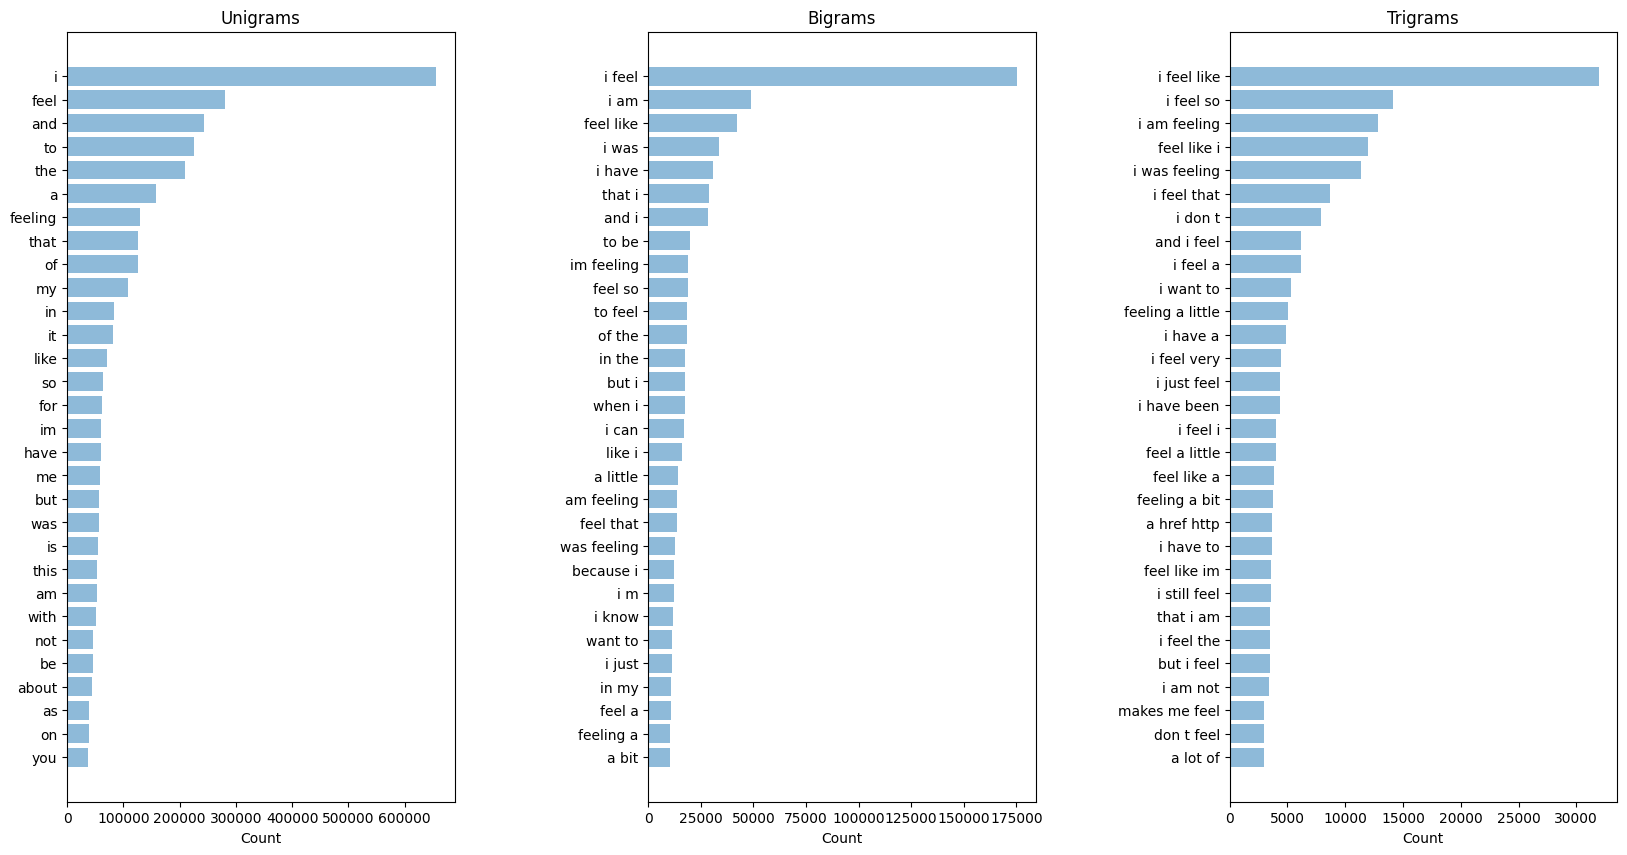

In [ ]:
def documentNgrams(documents, size):
    ngrams_all = []
    for document in documents:
        temp_tokens = document.split()
        if len(temp_tokens) <= size:
            continue
        else:
            output = list(ngrams(temp_tokens, size))
        for ngram in output:
            ngrams_all.append(" ".join(ngram))
    cnt_ngram = Counter()
    for word in ngrams_all:
        cnt_ngram[word] += 1
    df = pd.DataFrame.from_dict(cnt_ngram, orient='index').reset_index()
    df = df.rename(columns={'index':'words', 0:'count'})
    df = df.sort_values(by='count', ascending=False)
    df = df.head(30)
    df = df.sort_values(by='count')
    return(df)
def plotNgrams(documents):
    unigrams = documentNgrams(documents, 1)
    bigrams = documentNgrams(documents, 2)
    trigrams = documentNgrams(documents, 3)

    # Set plot figure size
    fig = plt.figure(figsize = (20, 10))
    plt.subplots_adjust(wspace=.5)

    ax = fig.add_subplot(131)
    ax.barh(np.arange(len(unigrams['words'])), unigrams['count'], align='center', alpha=.5)
    ax.set_title('Unigrams')
    plt.yticks(np.arange(len(unigrams['words'])), unigrams['words'])
    plt.xlabel('Count')

    ax2 = fig.add_subplot(132)
    ax2.barh(np.arange(len(bigrams['words'])), bigrams['count'], align='center', alpha=.5)
    ax2.set_title('Bigrams')
    plt.yticks(np.arange(len(bigrams['words'])), bigrams['words'])
    plt.xlabel('Count')

    ax3 = fig.add_subplot(133)
    ax3.barh(np.arange(len(trigrams['words'])), trigrams['count'], align='center', alpha=.5)
    ax3.set_title('Trigrams')
    plt.yticks(np.arange(len(trigrams['words'])), trigrams['words'])
    plt.xlabel('Count')
    plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig7.png')
    plt.show()
plotNgrams(Dataset['Text'])

In [ ]:
def documentNgrams(documents, size):
    ngrams_all = []
    for document in documents:
        temp_tokens = document.split()
        if len(temp_tokens) <= size:
            continue
        else:
            output = list(ngrams(temp_tokens, size))
        for ngram in output:
            ngrams_all.append(" ".join(ngram))
    cnt_ngram = Counter()
    for word in ngrams_all:
        cnt_ngram[word] += 1
    df = pd.DataFrame.from_dict(cnt_ngram, orient='index').reset_index()
    df = df.rename(columns={'index':'words', 0:'count'})
    df = df.sort_values(by='count', ascending=False)
    df = df.head(30)
    df = df.sort_values(by='count')
    return(df)
def plotNgrams(documents):
    unigrams = documentNgrams(documents, 1)
    bigrams = documentNgrams(documents, 2)
    trigrams = documentNgrams(documents, 3)

    # Set plot figure size
    fig = plt.figure(figsize=(20, 10))

    # Plot Unigrams
    plt.barh(np.arange(len(unigrams['words'])), unigrams['count'], align='center', alpha=0.5)
    plt.title('Unigrams')
    plt.yticks(np.arange(len(unigrams['words'])), unigrams['words'])
    plt.xlabel('Count')
    plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig8.png')
    plt.close()

    # Plot Bigrams
    plt.barh(np.arange(len(bigrams['words'])), bigrams['count'], align='center', alpha=0.5)
    plt.title('Bigrams')
    plt.yticks(np.arange(len(bigrams['words'])), bigrams['words'])
    plt.xlabel('Count')
    plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig9.png')
    plt.close()

    # Plot Trigrams
    plt.barh(np.arange(len(trigrams['words'])), trigrams['count'], align='center', alpha=0.5)
    plt.title('Trigrams')
    plt.yticks(np.arange(len(trigrams['words'])), trigrams['words'])
    plt.xlabel('Count')
    plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig10.png')
    plt.close()

plotNgrams(Dataset['Text'])

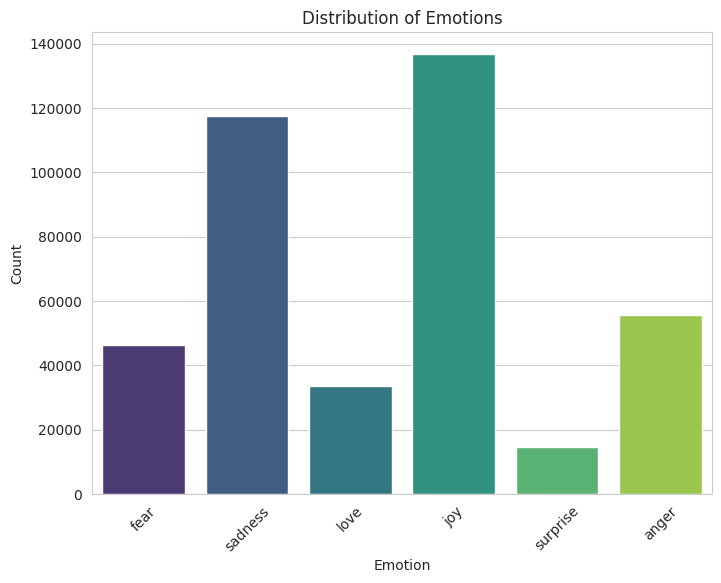

In [ ]:

# Set the style of the seaborn plot
sns.set_style("whitegrid")

# Create the count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=Dataset, x='Emotion', hue='Emotion', palette='viridis', legend=False)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig11.png')
plt.show()


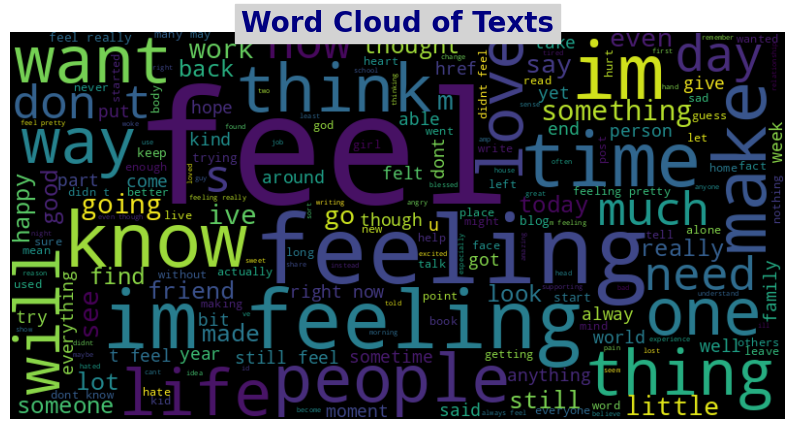

In [ ]:

# Concatenate all texts into a single string
all_texts = ' '.join(Dataset['Text'])

# Generate a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_texts)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
# ax.set_title(f'Word Cloud for {emotion}')  # Add this line to set title with formatting
plt.title('Word Cloud of Texts', fontsize=20, fontweight='bold', backgroundcolor='lightgrey', color='navy', horizontalalignment='center', verticalalignment='center')
plt.axis('off')  # Hide axis
plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig12.png')
plt.show()


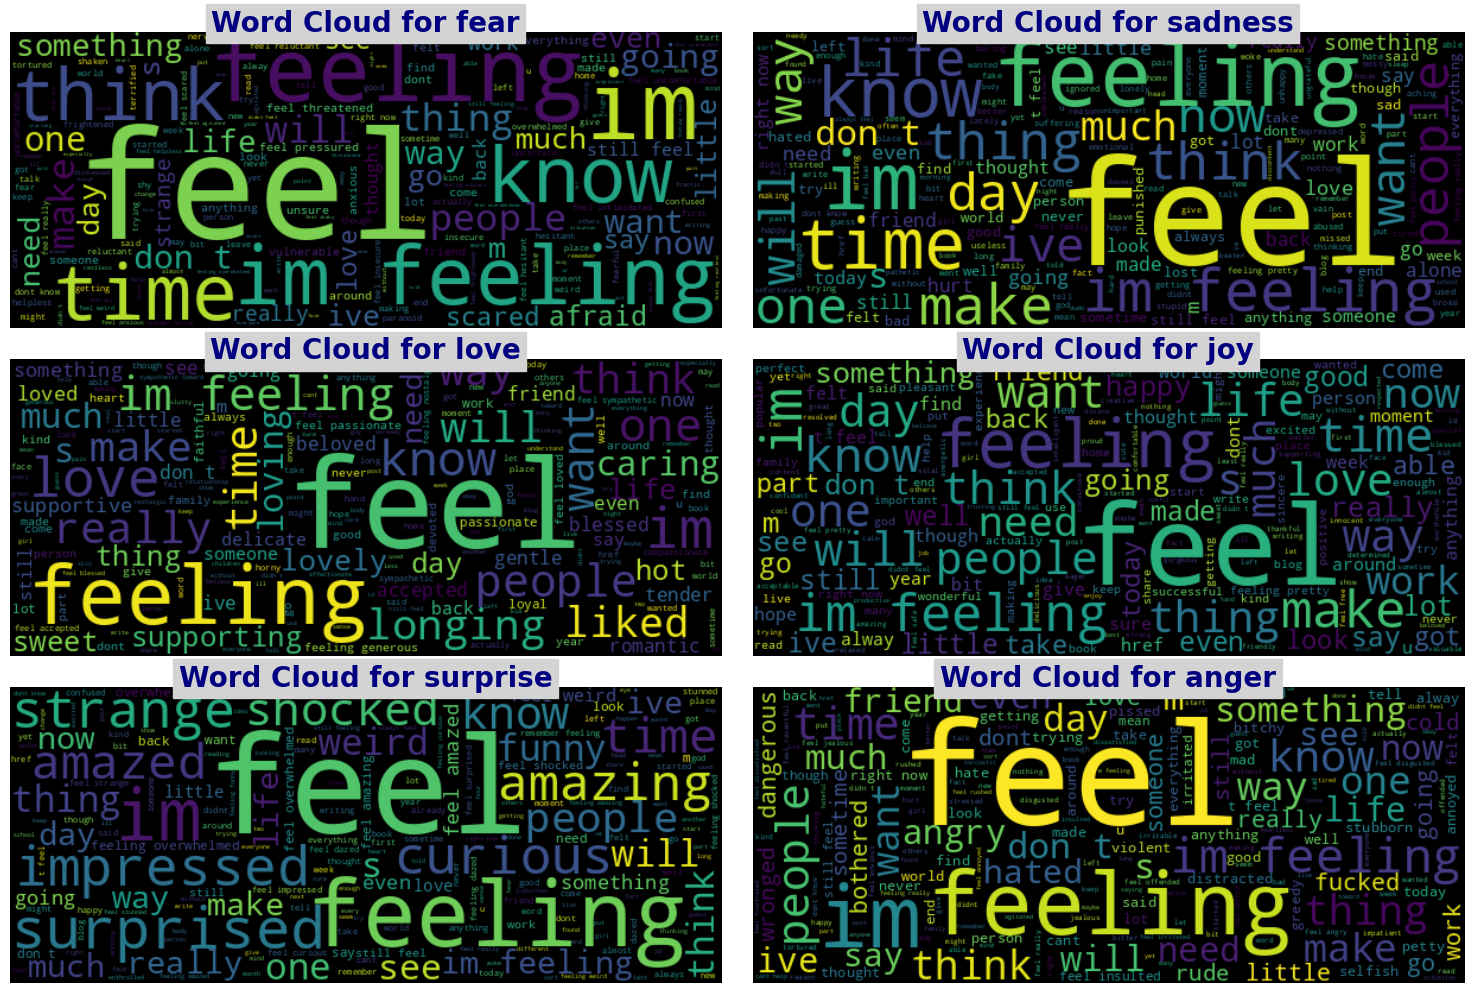

In [ ]:


# Define emotions present in the dataset
emotions = Dataset['Emotion'].unique()

# Calculate the number of rows and columns needed
num_emotions = len(emotions)
num_rows = (num_emotions + 1) // 2  # Adding 1 to ensure at least num_emotions / 2 rows
num_cols = min(2, num_emotions)  # Maximum 2 columns

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten axes if necessary
if num_emotions == 1:
    axes = [axes]

# Generate word cloud for each emotion
for i, emotion in enumerate(emotions):
    # Filter dataset for the current emotion
    text_for_emotion = ' '.join(Dataset[Dataset['Emotion'] == emotion]['Text'])

    # Generate word cloud for the current emotion
    wordcloud = WordCloud(width=600, height=250, background_color='black').generate(text_for_emotion)

    # Plot the word cloud for the current emotion
    row = i // num_cols
    col = i % num_cols
    ax = axes[row][col]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Word Cloud for {emotion}', fontsize=20, fontweight='bold',
                 backgroundcolor='lightgrey', color='navy',
                 horizontalalignment='center', verticalalignment='center')  # Add this line to set title with formatting
    ax.axis('off')

# Hide empty subplots if any
for i in range(num_emotions, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row][col].axis('off')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig13.png')
plt.show()


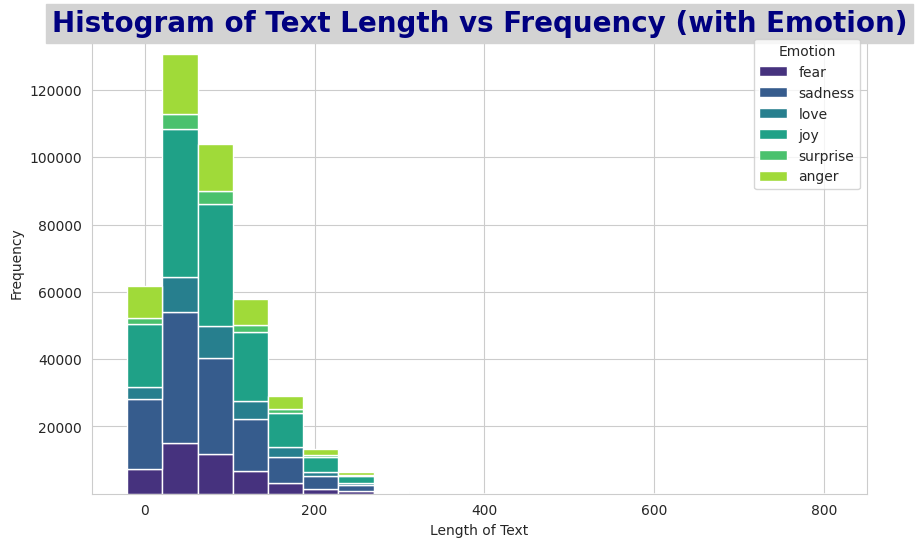

In [ ]:

# Set the style of the seaborn plot
sns.set_style("whitegrid")

# Define emotions present in the dataset
emotions = Dataset['Emotion'].unique()

# Create a custom palette with colors for all unique emotions in the dataset
custom_palette = sns.color_palette("viridis", len(emotions))

# Define the bin edges for the histogram
bin_edges = np.linspace(0, Dataset['Text'].apply(len).max(), 21)  # 20 bins

# Create the combined histogram
plt.figure(figsize=(10, 6))

# Initialize the bottom array as zeros
bottom = np.zeros(20)

for i, emotion in enumerate(emotions):
    # Filter dataset for the current emotion
    text_lengths = Dataset[Dataset['Emotion'] == emotion]['Text'].apply(len)

    # Plot the histogram for the current emotion, stacking on top of previous
    hist_values, _ = np.histogram(text_lengths, bins=bin_edges)
    plt.bar(bin_edges[:-1], hist_values, width=np.diff(bin_edges), color=custom_palette[i], alpha=1, label=emotion, bottom=bottom)

    # Update the bottom for the next histogram
    bottom += hist_values

# Add legend
plt.legend(title='Emotion')

plt.title('Histogram of Text Length vs Frequency (with Emotion)',
          fontsize=20, fontweight='bold',
          backgroundcolor='lightgrey', color='navy',
          horizontalalignment='center', verticalalignment='center')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig14.png')
plt.show()


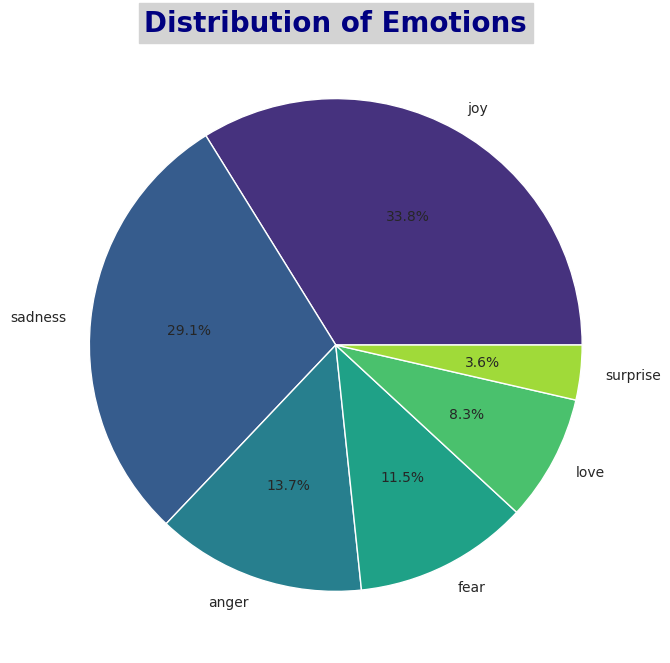

In [ ]:

# Get the counts of each emotion
emotion_counts = Dataset['Emotion'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(emotion_counts)))
plt.title('Distribution of Emotions',
          fontsize=20, fontweight='bold',
          backgroundcolor='lightgrey', color='navy',
          horizontalalignment='center', verticalalignment='center')
plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig15.png')
plt.show()


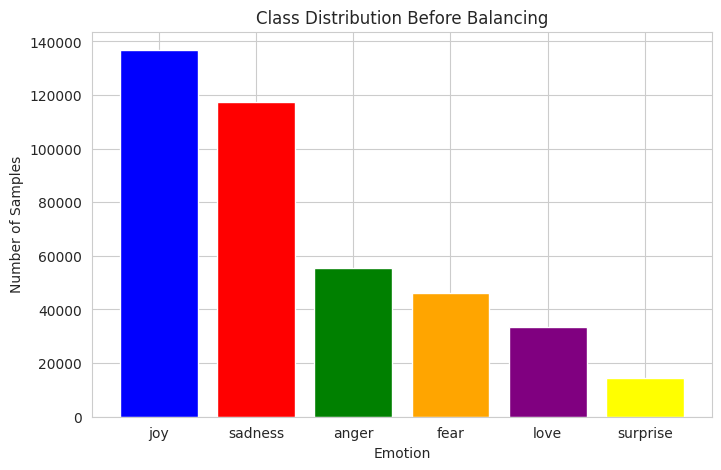

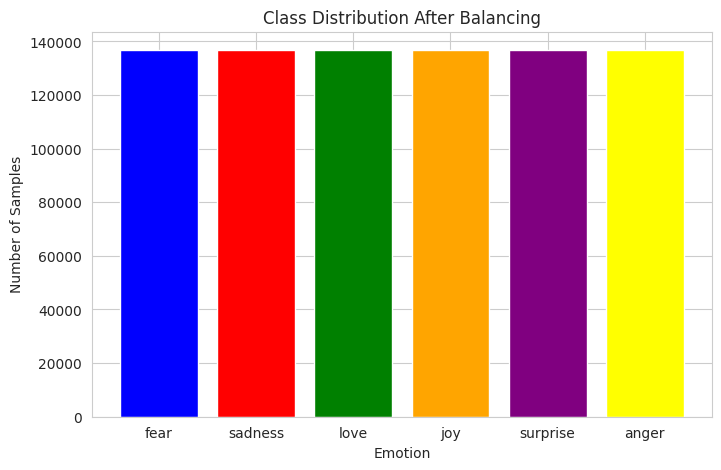

In [ ]:

# Assuming 'Dataset' is your DataFrame with a column named 'Emotion' indicating the emotion labels

# Define the class labels and their counts before balancing
class_counts_before = Dataset['Emotion'].value_counts()

# Plot class distribution before balancing
plt.figure(figsize=(8, 5))
plt.bar(class_counts_before.index, class_counts_before.values, color=['blue', 'red', 'green', 'orange', 'purple', 'yellow'])
plt.xlabel('Emotion')
plt.ylabel('Number of Samples')
plt.title('Class Distribution Before Balancing')
plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig16.png')
plt.show()

# Separate features and labels
X = Dataset.drop(columns=['Emotion'])
Y = Dataset['Emotion']

# Initialize RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Oversample the dataset
X_resampled, Y_resampled = oversampler.fit_resample(X, Y)

# Combine resampled features and labels into a DataFrame
Dataset = pd.concat([X_resampled, Y_resampled], axis=1)

# Define the class labels and their counts after balancing
class_counts_after = Dataset['Emotion'].value_counts()

# Plot class distribution after balancing
plt.figure(figsize=(8, 5))
plt.bar(class_counts_after.index, class_counts_after.values, color=['blue', 'red', 'green', 'orange', 'purple', 'yellow'])
plt.xlabel('Emotion')
plt.ylabel('Number of Samples')
plt.title('Class Distribution After Balancing')
plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig17.png')
plt.show()


#**Splitting the Dataset into Train, Validation and Test set**

In [ ]:
# Encode categorical labels
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Dataset['Emotion'])

In [ ]:
# Split data into training, validation, and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(Dataset["Text"], Y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)


In [ ]:
print(Y_train)

[2 4 4 ... 1 2 2]


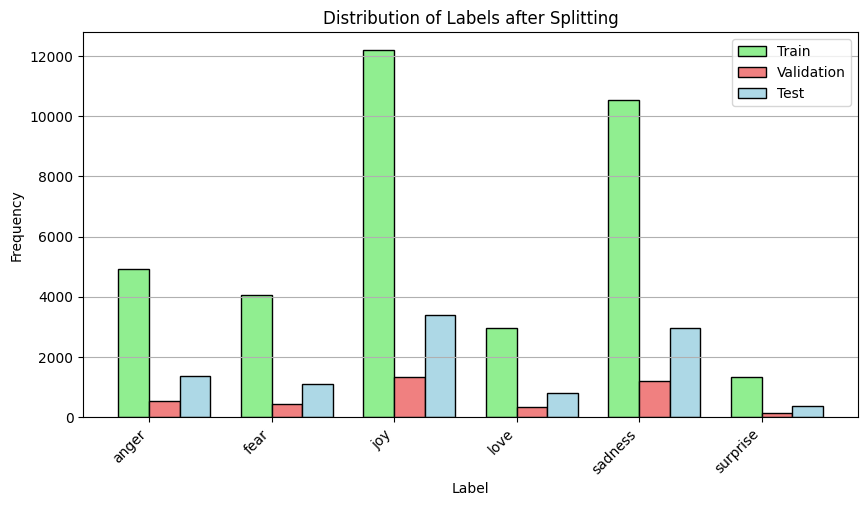

In [ ]:

# Generate unique labels and their counts for training set
unique_labels_train, label_counts_train = np.unique(Y_train, return_counts=True)

# Generate unique labels and their counts for validation set
unique_labels_val, label_counts_val = np.unique(Y_val, return_counts=True)

# Generate unique labels and their counts for testing set
unique_labels_test, label_counts_test = np.unique(Y_test, return_counts=True)

# Define emotion labels
emotion_labels = label_encoder.inverse_transform(unique_labels_train)

# Plot bar graph of labels after splitting
fig, ax = plt.subplots(figsize=(10, 5))
bar_width = 0.25
bar_positions_train = np.arange(len(unique_labels_train))
bar_positions_val = [pos + bar_width for pos in bar_positions_train]
bar_positions_test = [pos + bar_width * 2 for pos in bar_positions_train]

ax.bar(bar_positions_train, label_counts_train, bar_width, label='Train', color='lightgreen', edgecolor='black')
ax.bar(bar_positions_val, label_counts_val, bar_width, label='Validation', color='lightcoral', edgecolor='black')
ax.bar(bar_positions_test, label_counts_test, bar_width, label='Test', color='lightblue', edgecolor='black')
ax.set_title('Distribution of Labels after Splitting')
ax.set_xlabel('Label')
ax.set_ylabel('Frequency')

# Set X axis tick labels to emotion names
ax.set_xticks(bar_positions_train + bar_width / 2)
ax.set_xticklabels(emotion_labels, rotation=45, ha='right')

ax.legend()
ax.grid(axis='y')
plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig18.png')
plt.show()



#**Pre-processing Data**

##**Data Cleaning**

In [ ]:
def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()

In [ ]:
def remove_emojis(text):
    # Define the regular expression pattern to match emoji characters
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)

    # Replace emoji characters with an empty string
    return emoji_pattern.sub(r'', text)

In [ ]:
def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

In [ ]:
def lowercase_text(text):
    return text.lower()

In [ ]:
def Clean_Text(text):
    # Remove special characters, punctuation, numbers, and URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Removing Extra Spaces with Preceeding or successing Spaces
    text = re.sub(r"\s+", " ", text)
    text = text.strip()
    return text

In [ ]:
def tokenize_text(text):
    # Basically splits the long sentences into tokens of word
    tokens = word_tokenize(text)
    return tokens

In [ ]:
def remove_stopwords(tokens):
    # Sets the stop words in English like 'is', 'the' which have no importance
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

In [ ]:
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()  # Creating the instance of WordNetLemmatizer Class
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatizing the words in the tokens
    return lemmatized_tokens

In [ ]:
def stem_tokens(tokens):
    porter_stemmer = PorterStemmer()  # Creating the instance of PorterStemmer Class
    stemmed_tokens = [porter_stemmer.stem(token) for token in tokens]  # Stemming the words in the tokens
    return stemmed_tokens

In [ ]:
def Preprocessor(Tweet):
    Tweet = remove_html_tags(Tweet)
    Tweet = remove_emojis(Tweet)
    Tweet = expand_contractions(Tweet)
    Tweet = lowercase_text(Tweet)
    Clean_Tweets = Clean_Text(Tweet)
    Clean_Tweets = re.sub(r'[^\w\s]', '', Clean_Tweets)  # Remove punctuation marks
    Tokens = tokenize_text(Clean_Tweets)
    Tokens = remove_stopwords(Tokens)
    Lemmatized_Tokens = lemmatize_tokens(Tokens)
    # Stemmed_Tokens = stem_tokens(Lemmatized_Tokens)

    return Lemmatized_Tokens

In [ ]:
XYZ = Preprocessor("i feel like ive gotten to know many of you through comments and emails and for that im appreciative and glad you are a part of this little space")
print(XYZ)

['feel', 'like', 'gotten', 'know', 'many', 'comment', 'email', 'appreciative', 'glad', 'part', 'little', 'space']


##**Data Preparation**

In [ ]:
# Data Preparation
X_train_tokenized = X_train.apply(Preprocessor)
X_val_tokenized = X_val.apply(Preprocessor)
X_test_tokenized = X_test.apply(Preprocessor)

In [ ]:
print(X_train_tokenized)

4974          [look, baro, hyung, picture, feel, handsome]
8728                 [despondent, feeling, doubly, shitty]
2567     [probably, writing, like, journal, meant, coll...
30310    [feeling, friendly, towards, lycee, director, ...
27200    [know, decided, feel, weird, misrepresenting, ...
                               ...                        
7775     [feel, ignored, friend, family, online, friend...
38448    [feel, deeply, passionate, work, know, using, ...
19440    [feeling, pretty, terrified, full, nervous, en...
10007    [trying, get, done, feel, like, losing, valuab...
21336    [feel, privileged, amazing, caring, parent, st...
Name: Text, Length: 35989, dtype: object


In [ ]:
print(Y_train)

[2 4 4 ... 1 2 2]


In [ ]:
# Finding max sequence length
max_len = max(len(tokens) for tokens in X_train_tokenized)
print(max_len)
max_len=35

44


In [ ]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_tokenized)

In [ ]:
# Total number of unique words
num_words = len(tokenizer.word_index) + 1

In [ ]:
# Convert text sequences to sequences of integers
X_train_tokenized = tokenizer.texts_to_sequences(X_train_tokenized)
X_val_tokenized = tokenizer.texts_to_sequences(X_val_tokenized)
X_test_tokenized = tokenizer.texts_to_sequences(X_test_tokenized)

In [ ]:
# Padding sequences
X_train_tokenized = pad_sequences(X_train_tokenized, maxlen=max_len, padding='post')
X_val_tokenized = pad_sequences(X_val_tokenized, maxlen=max_len, padding='post')
X_test_tokenized = pad_sequences(X_test_tokenized, maxlen=max_len, padding='post')

In [ ]:
# Print the shape of the data
print("X_train_tokenized shape:", X_train_tokenized.shape)
print("X_val_tokenized shape:", X_val_tokenized.shape)
print("X_test_tokenized shape:", X_test_tokenized.shape)

X_train_tokenized shape: (35989, 35)
X_val_tokenized shape: (3999, 35)
X_test_tokenized shape: (9998, 35)


In [ ]:
# Print the first example in X_train
print("First example in X_train_tokenized:", X_train_tokenized[0])

First example in X_train_tokenized: [   52 10305 10306   524     1  1348     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0]


In [ ]:
# Total number of unique words
print("Total number of unique words:", num_words)

Total number of unique words: 20401


In [ ]:
print(Y_train)

[2 4 4 ... 1 2 2]


#**Model Building**

##Building and Training LSTM Model

In [ ]:
def build_lstm_model(num_words, embedding_dim, max_len, num_classes):
    model = Sequential()
    model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_len, trainable=True))
    model.add(SpatialDropout1D(0.2))  # Spatial dropout for regularization

    model.add(LSTM(512, return_sequences=True))  # LSTM layer with return_sequences=True for stacking
    model.add(Dropout(0.2))  # Dropout layer for regularization
    model.add(LSTM(256, return_sequences=True))  # Another LSTM layer
    model.add(Dropout(0.2))  # Dropout layer for regularization
    model.add(LSTM(128))  # Another LSTM layer
    model.add(Dropout(0.2))  # Dropout layer for regularization

    model.add(Dense(128, activation='relu'))  # Dense layer with ReLU activation
    model.add(Dropout(0.2))  # Dropout layer for regularization

    model.add(Dense(num_classes, activation='softmax'))  # Output layer with softmax activation

    optimizer = Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics='accuracy')
    # model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define hyperparameters
num_words = len(tokenizer.word_index) + 1  # Vocabulary size
embedding_dim = 100
num_classes = len(np.unique(Y_train))  # Number of classes

# Build and compile the model
lstm_model = build_lstm_model(num_words=num_words, embedding_dim=embedding_dim, max_len=max_len, num_classes=num_classes)


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = lstm_model.fit(X_train_tokenized, Y_train, epochs=50, batch_size=32, validation_data=(X_val_tokenized, Y_val),callbacks=[early_stopping])


Epoch 1/50
2249/2249 [==============================] - 38s 15ms/step - loss: 1.1858 - accuracy: 0.4445 - val_loss: 0.9064 - val_accuracy: 0.5833
Epoch 2/50
2249/2249 [==============================] - 32s 14ms/step - loss: 0.6209 - accuracy: 0.7910 - val_loss: 0.4190 - val_accuracy: 0.8649
Epoch 3/50
2249/2249 [==============================] - 33s 15ms/step - loss: 0.3604 - accuracy: 0.8848 - val_loss: 0.6640 - val_accuracy: 0.8084
Epoch 4/50
2249/2249 [==============================] - 32s 14ms/step - loss: 0.2610 - accuracy: 0.9077 - val_loss: 0.2142 - val_accuracy: 0.9138
Epoch 5/50
2249/2249 [==============================] - 32s 14ms/step - loss: 0.1838 - accuracy: 0.9259 - val_loss: 0.1886 - val_accuracy: 0.9231
Epoch 6/50
2249/2249 [==============================] - 32s 14ms/step - loss: 0.1391 - accuracy: 0.9374 - val_loss: 0.1569 - val_accuracy: 0.9320
Epoch 7/50
2249/2249 [==============================] - 32s 14ms/step - loss: 0.1125 - accuracy: 0.9443 - val_loss: 0.1460 -

In [ ]:
# Display model architecture
lstm_model.summary()

with open('/content/drive/MyDrive/Sentiment_Analyser/Trained_Models/lstm_model.pkl', 'wb') as f:
    pickle.dump(lstm_model, f)

##Building and Training Naive Bayes Model

In [ ]:

# Define the Naive Bayes pipeline
naive_bayes_model = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Convert text to TF-IDF features
    ('nb_classifier', MultinomialNB()),  # Naive Bayes classifier
])

# Train the Naive Bayes model
naive_bayes_model.fit(X_train, Y_train)


with open('/content/drive/MyDrive/Sentiment_Analyser/Trained_Models/naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(naive_bayes_model, f)

##Building and Training Random Forest Model

In [ ]:

# Initialize Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model
random_forest_model.fit(X_train_tokenized, Y_train)


with open('/content/drive/MyDrive/Sentiment_Analyser/Trained_Models/random_forest_model.pkl', 'wb') as f:
    pickle.dump(random_forest_model, f)

##Building and Training Gradient Boosting Model

In [ ]:

# Initialize Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting model
gradient_boosting_model.fit(X_train_tokenized, Y_train)


with open('/content/drive/MyDrive/Sentiment_Analyser/Trained_Models/gradient_boosting_model.pkl', 'wb') as f:
    pickle.dump(gradient_boosting_model, f)

##Building and Training SVM Model

In [ ]:
from sklearn.preprocessing import StandardScaler


# Initialize Support Vector Machine model
sc = StandardScaler()
X_train_svm = sc.fit_transform(X_train_tokenized)
X_val_svm = sc.transform(X_val_tokenized)
X_test_svm = sc.transform(X_test_tokenized)

svm_model = SVC(kernel='poly', random_state=42)

# Train the SVM model
svm_model.fit(X_train_svm, Y_train)


with open('/content/drive/MyDrive/Sentiment_Analyser/Trained_Models/svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

#**OR**

##**Importing Models**

In [ ]:
with open('/content/drive/MyDrive/Sentiment_Analyser/Trained_Models/lstm_model.pkl', 'rb') as f:
    lstm_model = pickle.load(f)

with open('/content/drive/MyDrive/Sentiment_Analyser/Trained_Models/naive_bayes_model.pkl', 'rb') as f:
    naive_bayes_model = pickle.load(f)

with open('/content/drive/MyDrive/Sentiment_Analyser/Trained_Models/random_forest_model.pkl', 'rb') as f:
    random_forest_model = pickle.load(f)

with open('/content/drive/MyDrive/Sentiment_Analyser/Trained_Models/gradient_boosting_model.pkl', 'rb') as f:
    gradient_boosting_model = pickle.load(f)

with open('/content/drive/MyDrive/Sentiment_Analyser/Trained_Models/svm_model.pkl', 'rb') as f:
    svm_model = pickle.load(f)

#**Evaluating the Model**

##Evaluating the LSTM Model

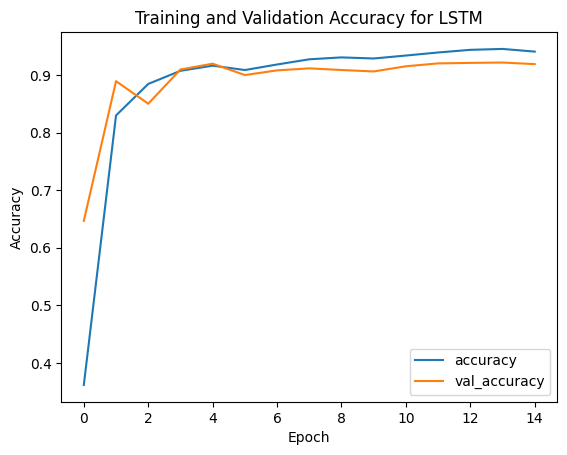

In [ ]:

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy for LSTM')
plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig19.png')
plt.show()

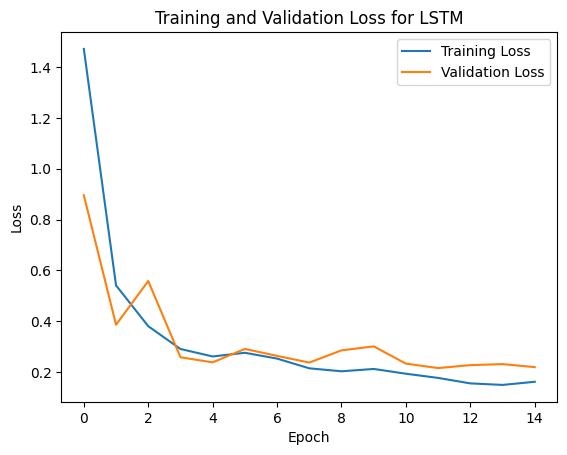

In [ ]:

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss for LSTM')
plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig20.png')
plt.show()


625/625 [==============================] - 5s 6ms/step


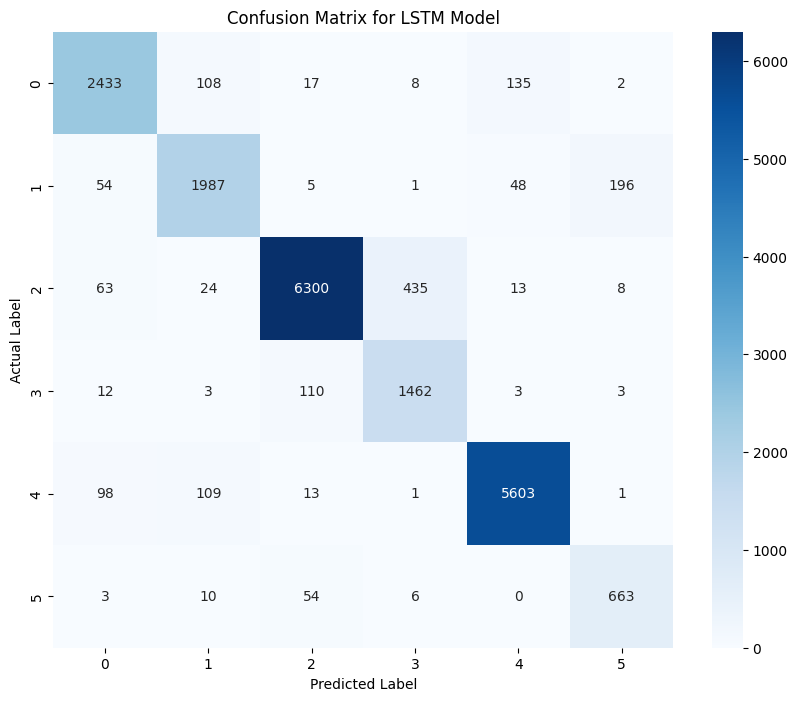

In [ ]:

# Evaluate the model on the test data
Y_pred_LSTM = lstm_model.predict(X_test_tokenized)
Y_pred_classes_LSTM = np.argmax(Y_pred_LSTM, axis=1)

# Generate a confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_classes_LSTM)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for LSTM Model')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig21.png')
plt.show()



In [ ]:


# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(Y_pred_LSTM, axis=1)

# Calculate evaluation metrics
accuracy_lstm = accuracy_score(Y_test, y_pred_classes)
precision_lstm, recall_lstm, f1_lstm, _ = precision_recall_fscore_support(Y_test, y_pred_classes, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy_lstm)
print("Precision:", precision_lstm)
print("Recall:", recall_lstm)
print("F1-score:", f1_lstm)

# Print classification report
print(classification_report(Y_test, y_pred_classes, target_names=label_encoder.classes_))


Accuracy: 0.9228152668700915
Precision: 0.9272148966605759
Recall: 0.9228152668700915
F1-score: 0.9240000334404863
              precision    recall  f1-score   support

       anger       0.91      0.90      0.91      2703
        fear       0.89      0.87      0.88      2291
         joy       0.97      0.92      0.94      6843
        love       0.76      0.92      0.83      1593
     sadness       0.97      0.96      0.96      5825
    surprise       0.76      0.90      0.82       736

    accuracy                           0.92     19991
   macro avg       0.88      0.91      0.89     19991
weighted avg       0.93      0.92      0.92     19991



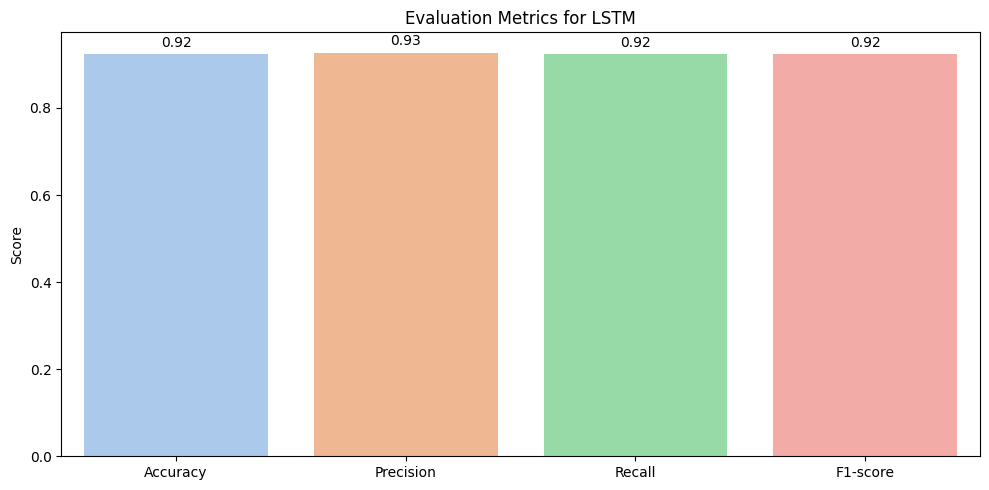

In [ ]:


# Plot evaluation metrics
metrics_names_lstm = ['Accuracy', 'Precision', 'Recall', 'F1-score']
metrics_values_lstm = [accuracy_lstm, precision_lstm, recall_lstm, f1_lstm]

plt.figure(figsize=(10, 5))
sns.barplot(x=metrics_names_lstm, y=metrics_values_lstm, hue=metrics_names_lstm, palette='pastel', dodge=False)
plt.title('Evaluation Metrics for LSTM')
plt.ylabel('Score')

# Integrate classification report values into the plot
for i, v in enumerate(metrics_values_lstm):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig22.png')
plt.show()


##Evaluating the Naive Bayes Model

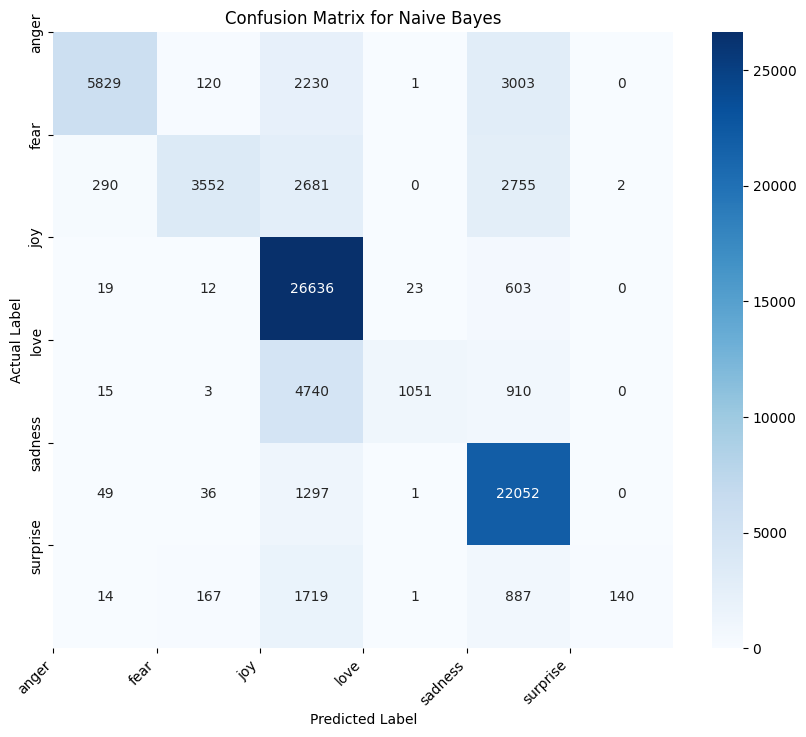

In [ ]:
#  Predictions
Y_pred_NB = naive_bayes_model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_NB)

# Define emotion labels
emotion_labels = label_encoder.inverse_transform(np.unique(Y_test))

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

# Set X and Y axis tick labels to emotion names
plt.xticks(np.arange(len(emotion_labels)), emotion_labels, rotation=45, ha='right')
plt.yticks(np.arange(len(emotion_labels)), emotion_labels)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig23.png')
plt.show()





In [ ]:

# Calculate evaluation metrics
accuracy_NB = accuracy_score(Y_test, Y_pred_NB)
precision_NB, recall_NB, f1_NB, _ = precision_recall_fscore_support(Y_test, Y_pred_NB, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy_NB)
print("Precision:", precision_NB)
print("Recall:", recall_NB)
print("F1-score:", f1_NB)

# Print classification report
print(classification_report(Y_test, Y_pred_NB))


Accuracy: 0.7330710804324698
Precision: 0.7917964161082509
Recall: 0.7330710804324698
F1-score: 0.6887456567718467
              precision    recall  f1-score   support

           0       0.94      0.52      0.67     11183
           1       0.91      0.38      0.54      9280
           2       0.68      0.98      0.80     27293
           3       0.98      0.16      0.27      6719
           4       0.73      0.94      0.82     23435
           5       0.99      0.05      0.09      2928

    accuracy                           0.73     80838
   macro avg       0.87      0.50      0.53     80838
weighted avg       0.79      0.73      0.69     80838



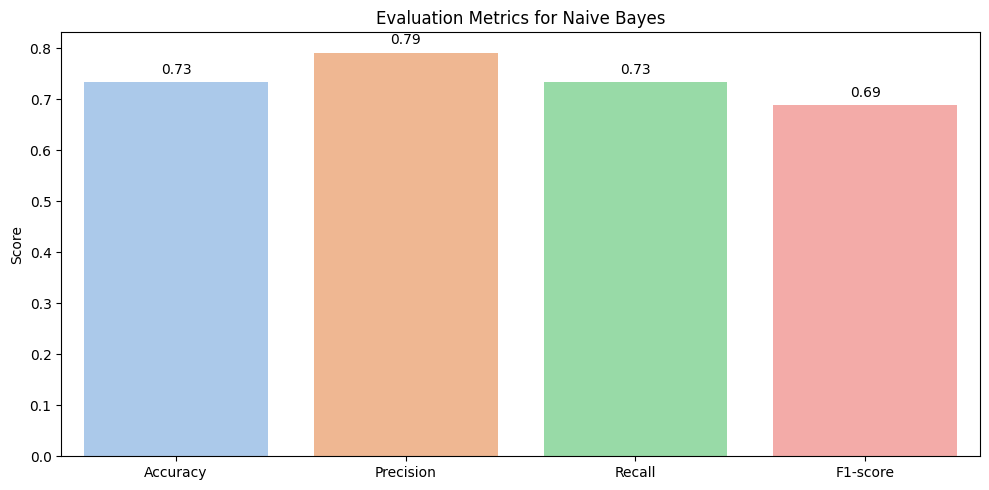

In [ ]:
# Plot evaluation metrics
metrics_names_NB = ['Accuracy', 'Precision', 'Recall', 'F1-score']
metrics_values_NB = [accuracy_NB, precision_NB, recall_NB, f1_NB]

plt.figure(figsize=(10, 5))
sns.barplot(x=metrics_names_NB, y=metrics_values_NB, hue=metrics_names_NB, palette='pastel', dodge=False)
plt.title('Evaluation Metrics for Naive Bayes')
plt.ylabel('Score')

# Integrate classification report values into the plot
for i, v in enumerate(metrics_values_NB):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig24.png')
plt.show()


##Evaluating the Random Forest Model

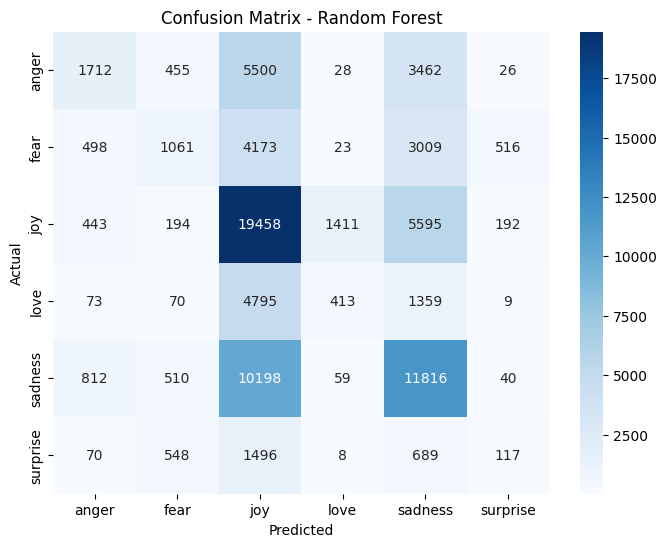

In [ ]:
# Predictions
y_pred_rf = random_forest_model.predict(X_test_tokenized)

# Calculate confusion matrix
conf_matrix_rf = confusion_matrix(Y_test, y_pred_rf)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='g', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig25.png')
plt.show()




In [ ]:

# Calculate evaluation metrics
accuracy_rf = accuracy_score(Y_test, y_pred_rf)
precision_rf, recall_rf, f1_rf, _ = precision_recall_fscore_support(Y_test, y_pred_rf, average='weighted')

# Print evaluation metrics
print("Random Forest Model Evaluation:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)


# Print classification report
print(classification_report(Y_test, y_pred_rf))


Random Forest Model Evaluation:
Accuracy: 0.4277320072243252
Precision: 0.4070540185516672
Recall: 0.4277320072243252
F1-score: 0.3812505263430563
              precision    recall  f1-score   support

           0       0.47      0.15      0.23     11183
           1       0.37      0.11      0.18      9280
           2       0.43      0.71      0.53     27293
           3       0.21      0.06      0.10      6719
           4       0.46      0.50      0.48     23435
           5       0.13      0.04      0.06      2928

    accuracy                           0.43     80838
   macro avg       0.35      0.26      0.26     80838
weighted avg       0.41      0.43      0.38     80838



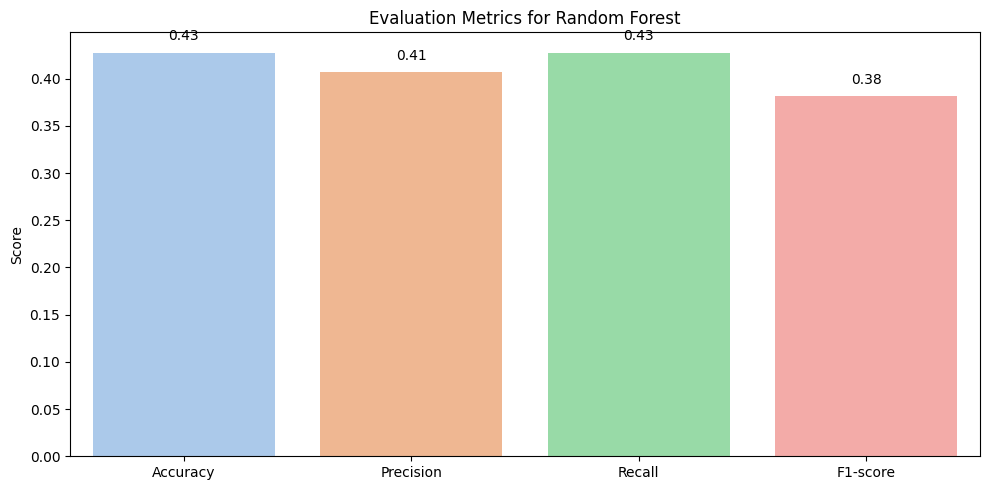

In [ ]:


# Plot evaluation metrics
metrics_names_rf = ['Accuracy', 'Precision', 'Recall', 'F1-score']
metrics_values_rf = [accuracy_rf, precision_rf, recall_rf, f1_rf]

plt.figure(figsize=(10, 5))
sns.barplot(x=metrics_names_rf, y=metrics_values_rf, hue=metrics_names_rf, palette='pastel', dodge=False)
plt.title('Evaluation Metrics for Random Forest')
plt.ylabel('Score')

# Integrate classification report values into the plot
for i, v in enumerate(metrics_values_rf):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig26.png')
plt.show()

##Evaluating the Gradient Boosting Model

In [ ]:
# Predictions
y_pred_gb = gradient_boosting_model.predict(X_test_tokenized)

# Calculate confusion matrix
conf_matrix_gb = confusion_matrix(Y_test, y_pred_gb)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, cmap='Blues', fmt='g', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting')
plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig27.png')
plt.show()


In [ ]:
# Calculate evaluation metrics
accuracy_gb = accuracy_score(Y_test, y_pred_gb)
precision_gb, recall_gb, f1_gb, _ = precision_recall_fscore_support(Y_test, y_pred_gb, average='weighted')

# Print evaluation metrics
print("Gradient Boosting Model Evaluation:")
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1-score:", f1_gb)

# Print classification report
print(classification_report(Y_test, y_pred_gb))

In [ ]:
# Plot evaluation metrics
metrics_names_gb = ['Accuracy', 'Precision', 'Recall', 'F1-score']
metrics_values_gb = [accuracy_gb, precision_gb, recall_gb, f1_gb]

plt.figure(figsize=(10, 5))
sns.barplot(x=metrics_names_gb, y=metrics_values_gb, hue=metrics_names_gb, palette='pastel', dodge=False)
plt.title('Evaluation Metrics for Gradient Boosting')
plt.ylabel('Score')

# Integrate classification report values into the plot
for i, v in enumerate(metrics_values_gb):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig28.png')
plt.show()

##Evaluating the SVM Model

In [ ]:
# Predictions
y_pred_svm = svm_model.predict(X_test_svm)

# Calculate confusion matrix
conf_matrix_svm = confusion_matrix(Y_test, y_pred_svm)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='g', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig29.png')
plt.show()



In [ ]:
# Calculate evaluation metrics
accuracy_svm = accuracy_score(Y_test, y_pred_svm)
precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(Y_test, y_pred_svm, average='weighted')

# Print evaluation metrics
print("Support Vector Machine Model Evaluation:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_svm)

# Print classification report
print(classification_report(Y_test, y_pred_svm))

In [ ]:
# Plot evaluation metrics
metrics_names_svm = ['Accuracy', 'Precision', 'Recall', 'F1-score']
metrics_values_svm = [accuracy_svm, precision_svm, recall_svm, f1_svm]

plt.figure(figsize=(10, 5))
sns.barplot(x=metrics_names_svm, y=metrics_values_svm, hue=metrics_names_svm, palette='pastel', dodge=False)
plt.title('Evaluation Metrics for Support Vector Machine')
plt.ylabel('Score')

# Integrate classification report values into the plot
for i, v in enumerate(metrics_values_svm):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig30.png')
plt.show()

#**Comparing the Models Evaluation**

In [ ]:

# Define model names and corresponding evaluation metrics
model_names = ["SVM", "Naive Bayes", "Gradient Boosting", "LSTM", "Random Forest"]
accuracies = [accuracy_svm ,accuracy_NB, accuracy_gb, accuracy_lstm, accuracy_rf]
precisions = [precision_svm, precision_NB, precision_gb, precision_lstm, precision_rf]
f1_scores = [f1_svm, f1_NB, f1_gb, f1_lstm, f1_rf]
recalls = [recall_svm, recall_NB, recall_gb, recall_lstm, recall_rf]




In [ ]:
# Plotting Accuracy
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=model_names, y=accuracies, palette='pastel', hue=model_names, dodge=False, legend=False)
plt.title('Accuracy of All Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Adding text annotations to each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 5),
                     textcoords = 'offset points')

plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig31.png')
plt.show()


In [ ]:
# Plotting Precision
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=model_names, y=precisions, palette='pastel', hue=model_names, dodge=False, legend=False)
plt.title('Precision of All Models')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Adding text annotations to each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 5),
                     textcoords = 'offset points')

plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig32.png')
plt.show()


In [ ]:
# Plotting F1-score
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=model_names, y=f1_scores, palette='pastel', hue=model_names, dodge=False, legend=False)
plt.title('F1-score of All Models')
plt.xlabel('Model')
plt.ylabel('F1-score')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Adding text annotations to each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 5),
                     textcoords = 'offset points')


plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig33.png')
plt.show()


In [ ]:
# Plotting Recall
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=model_names, y=recalls, palette='pastel', hue=model_names, dodge=False, legend=False)
plt.title('Recall of All Models')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Adding text annotations to each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 5),
                     textcoords = 'offset points')

plt.savefig('/content/drive/MyDrive/Sentiment_Analyser/Visualizations/Fig34.png')
plt.show()


#**Predicting the Emotion of Large Data**

In [ ]:

# Load the CSS file with the "Text" column
df = pd.read_csv(output_data_file_path)

# Preprocess the text data
X = df['Text'].apply(Preprocessor)

# Tokenize and pad the text data
sequences = tokenizer.texts_to_sequences(X)
X = pad_sequences(sequences, maxlen=max_len)

# Perform predictions using the LSTM model
predicted_emotions = lstm_model.predict(X)

# Convert predicted emotions to labels
predicted_labels = [emotions[np.argmax(pred)] for pred in predicted_emotions]

# Add predicted emotions as a new column
df['Emotion'] = predicted_labels

# Save the updated dataframe
df.to_csv('/content/drive/MyDrive/Sentiment_Analyser/Dataset/text_data_output.csv', index=False)


#**Exporting the Models**

In [ ]:

# Assuming you have trained an LSTM model called 'my_lstm_model'
with open('/content/drive/MyDrive/Sentiment_Analyser/Trained_Models/lstm_model.pkl', 'wb') as f:
    pickle.dump(lstm_model, f)
with open('/content/drive/MyDrive/Sentiment_Analyser/Trained_Models/naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(naive_bayes_model, f)
with open('/content/drive/MyDrive/Sentiment_Analyser/Trained_Models/random_forest_model.pkl', 'wb') as f:
    pickle.dump(random_forest_model, f)
with open('/content/drive/MyDrive/Sentiment_Analyser/Trained_Models/gradient_boosting_model.pkl', 'wb') as f:
    pickle.dump(gradient_boosting_model, f)
with open('/content/drive/MyDrive/Sentiment_Analyser/Trained_Models/svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)


with open('/content/drive/MyDrive/Sentiment_Analyser/Trained_Models/tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
with open('/content/drive/MyDrive/Sentiment_Analyser/Trained_Models/label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)


In [ ]:

with open('/content/drive/MyDrive/Sentiment_Analyser/Trained_Models/lstm_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


# Function to preprocess user input
def preprocess_input(text):
    # Preprocess the input text as you did for training data
    # You can reuse the preprocess_text function defined earlier
    # Make sure to tokenize, remove stopwords, lemmatize/stem, etc.
    processed_text = Preprocessor(text)
    return processed_text


# Function to predict emotion
def predict_emotion(text):
    # Preprocess the input text
    processed_text = preprocess_input(text)
    # Tokenize the processed text
    tokenized_text = tokenizer.texts_to_sequences([processed_text])

    # Pad sequences
    padded_text = pad_sequences(tokenized_text, maxlen=max_len, padding='post')

    # Make prediction
    emotion_probabilities = loaded_model.predict(padded_text)[0]

    # Get the predicted emotion class
    predicted_emotion_class = np.argmax(emotion_probabilities)

    # Map predicted class to emotion label
    predicted_emotion_label = label_encoder.classes_[predicted_emotion_class]

    return predicted_emotion_label

while(True):
  # Take input from user
  user_input = input("Enter your text or Exit: ")
  if user_input.lower()=="exit":
    print("Thank You!")
    break
  # Predict emotion
  predicted_emotion = predict_emotion(user_input)

  # Display predicted emotion
  print("Predicted Emotion:", predicted_emotion)

#**Predicting the Single Emotion**

In [ ]:
# Function to preprocess user input
def preprocess_input(text):
    # Preprocess the input text as you did for training data
    # You can reuse the preprocess_text function defined earlier
    # Make sure to tokenize, remove stopwords, lemmatize/stem, etc.
    processed_text = Preprocessor(text)
    return processed_text

# Function to predict emotion
def predict_emotion(text):
    # Preprocess the input text
    processed_text = preprocess_input(text)

    # Tokenize the processed text
    tokenized_text = tokenizer.texts_to_sequences([processed_text])

    # Pad sequences
    padded_text = pad_sequences(tokenized_text, maxlen=max_len, padding='post')

    # Make prediction
    emotion_probabilities = lstm_model.predict(padded_text)[0]

    # Get the predicted emotion class
    predicted_emotion_class = np.argmax(emotion_probabilities)

    # Map predicted class to emotion label
    predicted_emotion_label = label_encoder.classes_[predicted_emotion_class]

    return predicted_emotion_label

while(True):
  # Take input from user
  user_input = input("Enter your text or Exit: ")
  if user_input.lower()=="exit":
    print("Thank You!")
    break
  # Predict emotion
  predicted_emotion = predict_emotion(user_input)

  # Display predicted emotion
  print("Predicted Emotion:", predicted_emotion)
